In [79]:
from docx import Document

# Load the Word document
doc = Document('data.docx')

# Initialize an empty list to store the split information
split_data = []

# Iterate through each paragraph in the document
for para in doc.paragraphs:
    # Get the text and split it by '|'
    split_paragraph = para.text.split('|')
    
    # Append each split part to the array
    split_data.extend(split_paragraph)

split_data = split_data[3:]

In [80]:
import ast

def parse_2d_array_from_string(data_string):
    # Safely evaluate the string to convert it into a Python object (list)
    return ast.literal_eval(data_string)
control_points = split_data[0:15]
weights = split_data[29:-1]

# Parse each element in split_data into a 2D array
weights = [parse_2d_array_from_string(data) for data in weights]
control_points = [parse_2d_array_from_string(data) for data in control_points]


In [81]:
len(weights)

30

In [82]:
len(control_points)

15

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\mechadmin\Documents\GitHub\pyiga\.venv\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['grid', 'identity']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


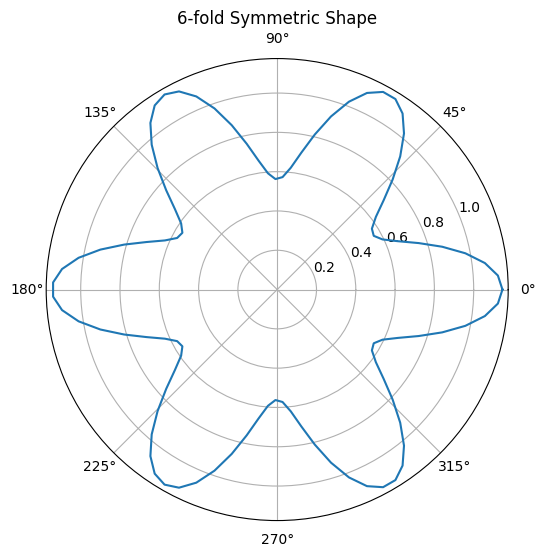

In [83]:
# %matplotlib inline
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
import matplotlib.pyplot as plt
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(theta, r, d, n, a, L0):
    c = cal_c(r,a,L0)
    return c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
d = 0.8
r = 0.4
n = 6
a = 0.1
L0 = 25
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
theta_values = np.linspace(0, 2 * np.pi, 100)
result = superformula(theta_values, r, d, n, a, L0)
plt.figure(figsize=(6, 6))
plt.polar(theta_values, result)
plt.title(f"{n}-fold Symmetric Shape")
plt.show()
# print(polar_to_cartesian(result, theta_values))

(1, 64)
(1, 64)
(64, 2)
(1, 64)
(64,)
(64,)


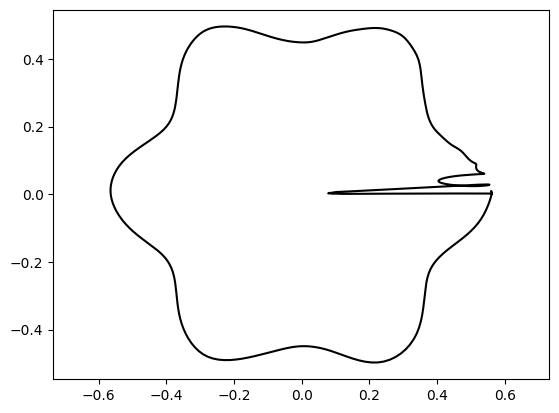

In [84]:
from pyiga.geometry import *
from pyiga import approx, bspline
nn = 14
ctlpts = np.array(control_points[nn])
weight = np.array(weights[nn])
print(weight.shape)
# ctlpts = np.hstack([ctlpts, ctlpts[:, 0].reshape(2, 1)])
# weight = np.append(weight, weight[0][0])
print(weight.shape)
n_kv = 61
kv = bspline.make_knots(3, 0.0, 1.0, n_kv)
coeff = ctlpts.transpose()
grid = (np.linspace(0.0, 1.0, 100),)
print(coeff.shape)
print(weight.shape)
weight = weight.transpose().reshape(64)
print(weight.shape)
N = tuple(kv.numdofs for kv in (kv,))
# print(N)
nurbs = NurbsFunc((kv,), coeff.copy(), weights=weight)
vals = nurbs.grid_eval(grid)

vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
axis('equal');


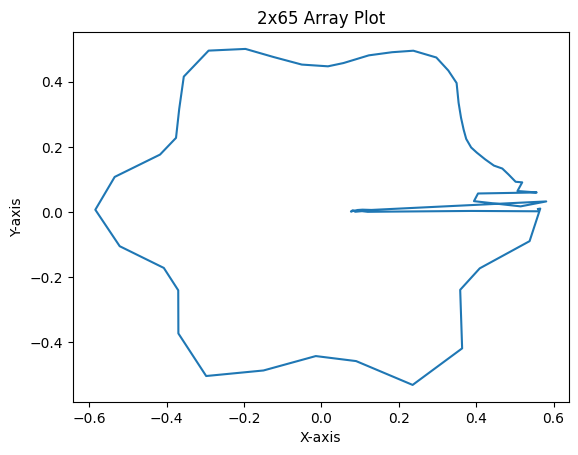

In [85]:
# Plot the data
plt.plot(ctlpts[0], ctlpts[1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x65 Array Plot')

# Show the plot
plt.show()

In [86]:
ctlpts.shape

(2, 64)

In [87]:
import itertools

def gen_grid(d, points_per_axis, lb=0., rb=1.):
    ''' Generate a grid in a d-dimensional space 
        within the range [lb, rb] for each axis '''
    
    lincoords = []
    for i in range(0, d):
        lincoords.append(np.linspace(lb, rb, points_per_axis))
    coords = list(itertools.product(*lincoords))
    
    return np.array(coords)
X = ctlpts
Z = None
scale = 0.8
points_per_axis = None
if Z is None or Z.shape[1] != 2 or points_per_axis is None:
    N = X.shape[0]
    points_per_axis = int(N**.5)
    bounds = (0., 3.)
    Z = gen_grid(2, points_per_axis, bounds[0], bounds[1]) # Generate a grid
    
scale /= points_per_axis*1.3


In [88]:
scale

0.6153846153846154

In [89]:
z = 0
for (i, z) in enumerate(Z):
        z =z

In [90]:
xys = ctlpts.transpose()
xscl = scale
yscl = scale
z1 = z[0]
z2 = .3*z[1]
max_distance = 0.3
scaled_coords = [(x * xscl + z1, y * yscl + z2) for (x, y) in xys]
segments = []
segment = [scaled_coords[0]]
for i in range(1, len(scaled_coords)):
    dist = np.sqrt((scaled_coords[i][0] - segment[-1][0]) ** 2 +
                    (scaled_coords[i][1] - segment[-1][1]) ** 2)
    if dist <= max_distance:
        segment.append(scaled_coords[i])
    else:
        segments.append(segment)
        segment = [scaled_coords[i]]
segments.append(segment)


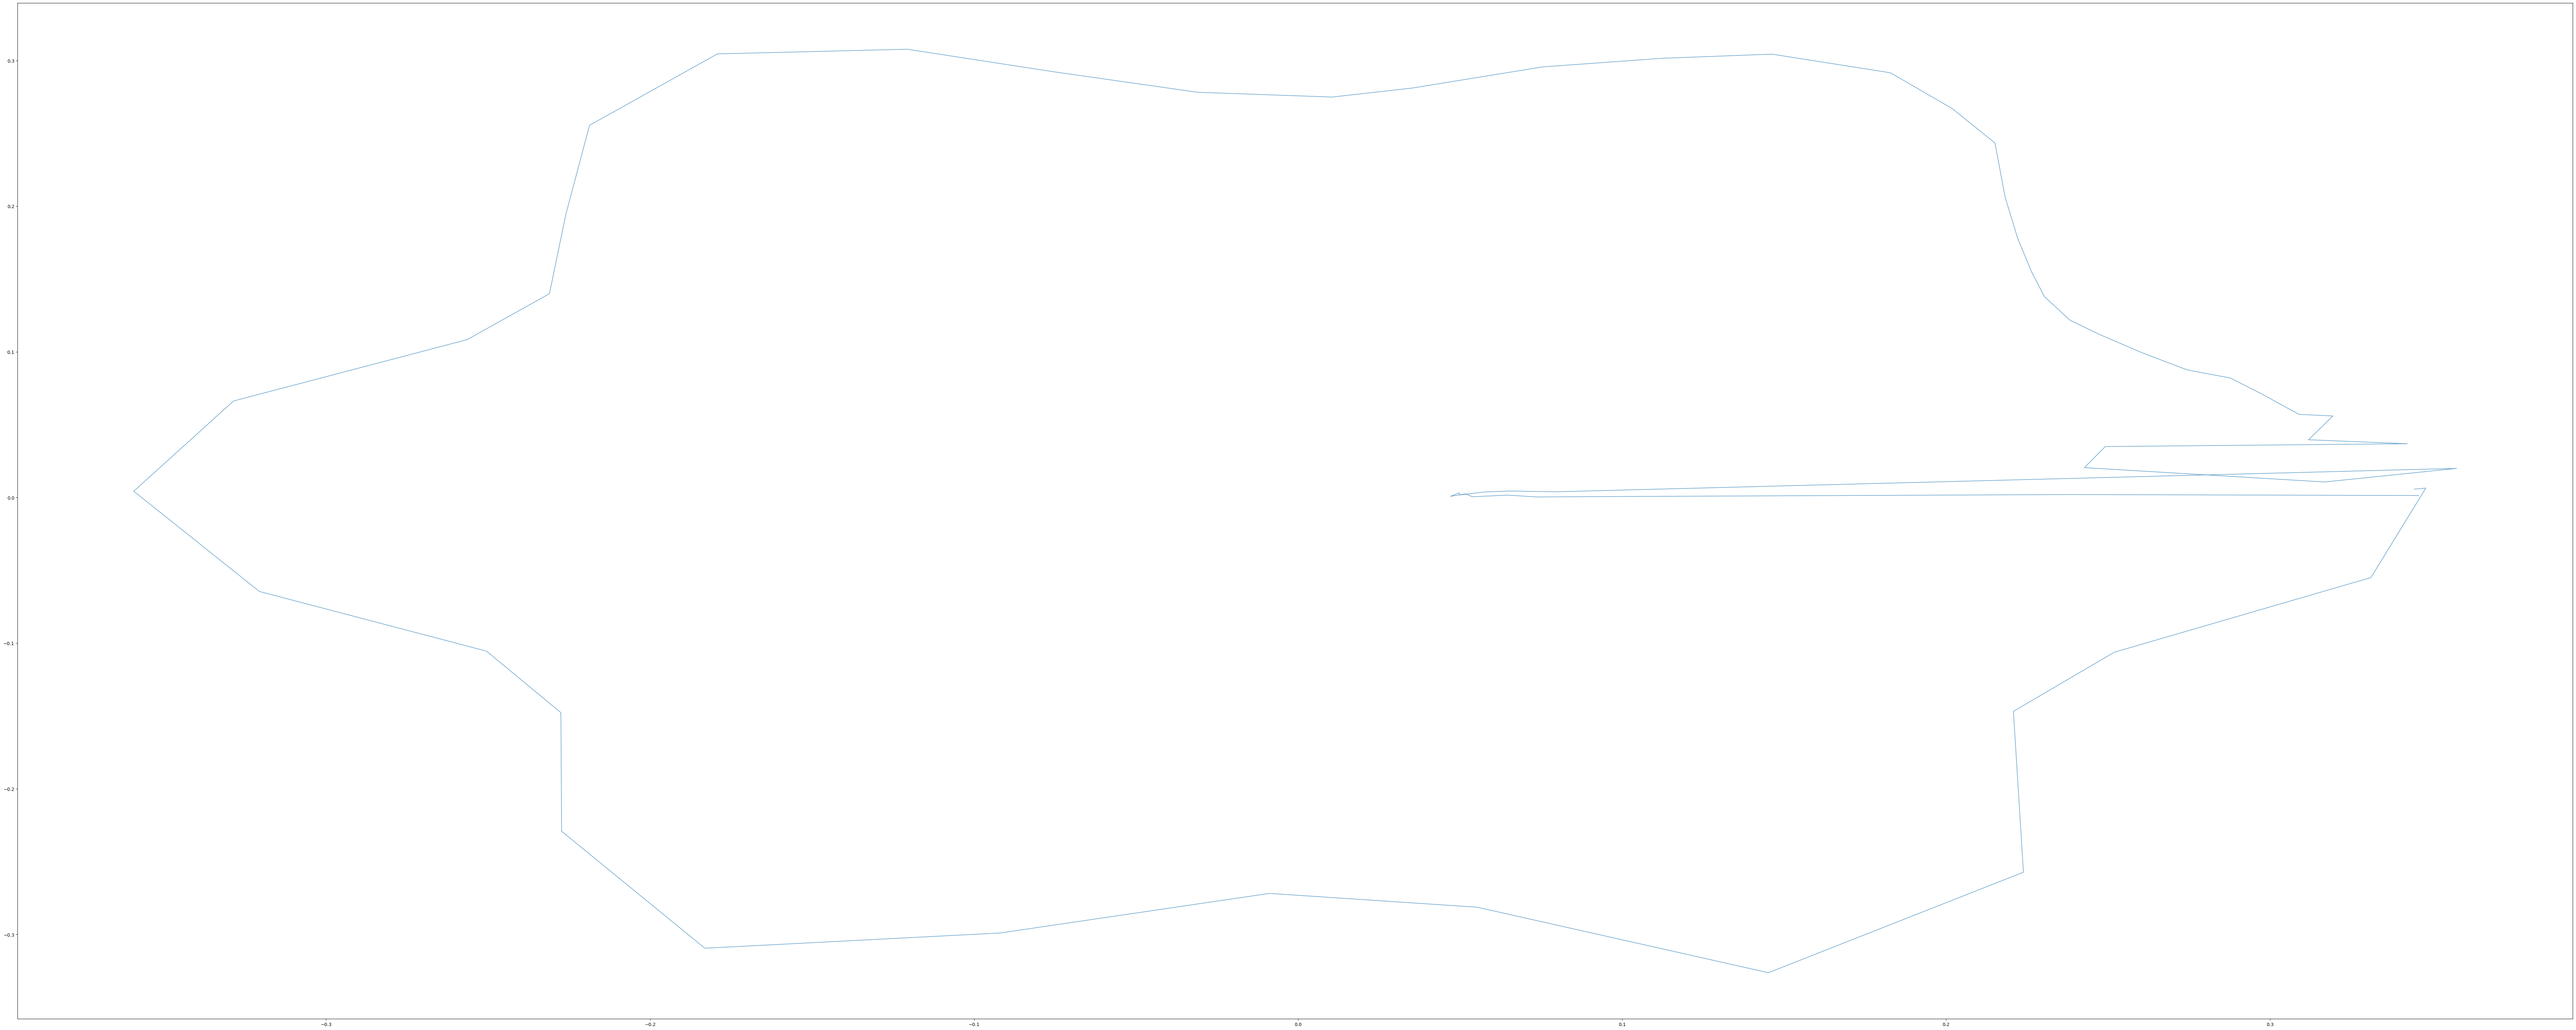

In [91]:
fig = plt.figure(figsize=(100, 40))
ax = fig.add_subplot(111)
for segment in segments:
    ax.plot(*zip(*segment),lw=1.2, alpha=.7)
segments = np.array(segments[0])

In [92]:
scaled_coords = np.array(scaled_coords)

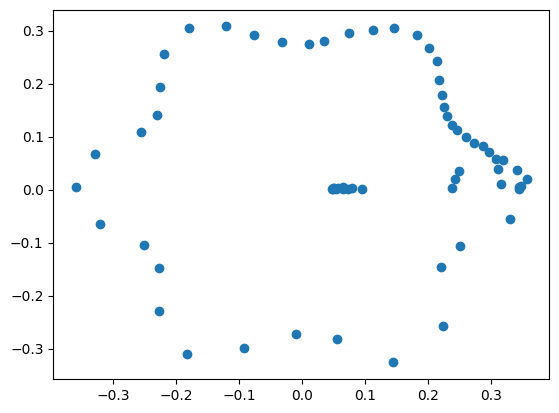

In [102]:
plt.scatter(scaled_coords[:,0] ,scaled_coords[:,1])


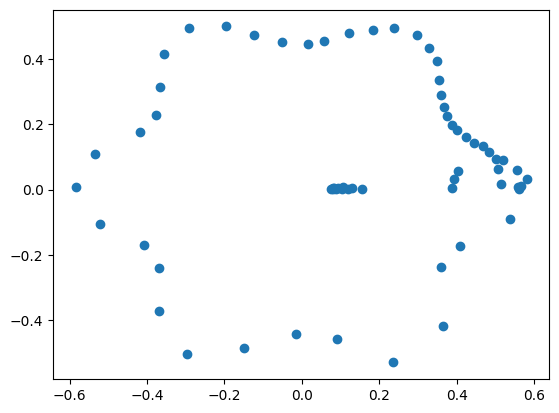

In [95]:
plt.scatter(ctlpts[0],ctlpts[1])


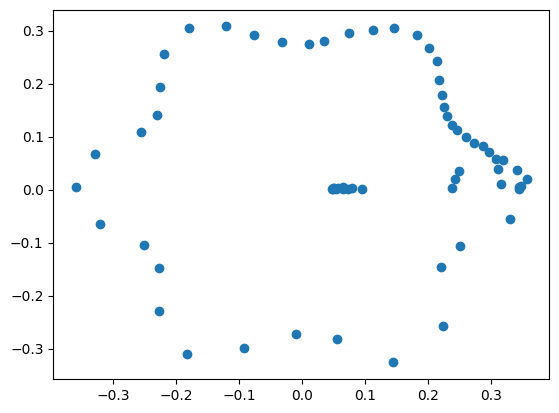

In [96]:
plt.scatter(segments[:,0], segments[:,1])


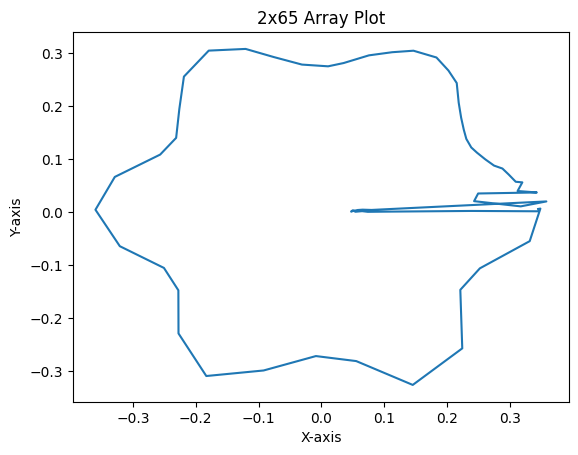

In [97]:
# Plot the data
plt.plot(segments[:,0], segments[:,1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x65 Array Plot')

# Show the plot
plt.show()

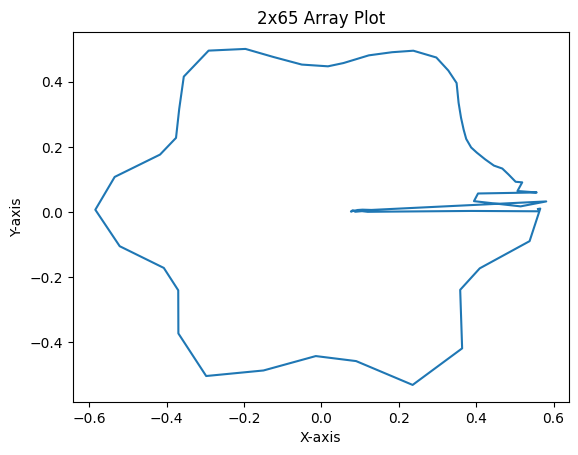

In [98]:
# Plot the data
plt.plot(ctlpts[0],ctlpts[1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x65 Array Plot')

# Show the plot
plt.show()

In [99]:
arr = np.load('C:\\Users\\mechadmin\\Documents\\GitHub\\pyiga\\EGAN\\data\\train2.npy')

In [100]:
arr.shape

(500, 192, 2)

In [101]:
superformula_points[0][0]

NameError: name 'superformula_points' is not defined

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
# Superformula generation function
def superformula(m, n1, n2, n3, a=1, b=1, num_points=500):
    phi = np.linspace(0, 2 * np.pi, num_points)
    r = (np.abs(np.cos(m * phi / 4) / a)**n2 + np.abs(np.sin(m * phi / 4) / b)**n3)**(-1 / n1)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return np.vstack((x, y)).T


# Generate a dataset of superformula points
superformula_params = [(m, n1, n2, n3) for m in range(1, 10) for n1 in range(1, 5) for n2 in range(1, 5) for n3 in range(1, 5)]
superformula_points = [superformula(*params) for params in superformula_params]

def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(r, L0, n, a=0.5, d=1, num_res=100):
    theta = np.linspace(0, 2 * np.pi, num_res)
    c = cal_c(r,a,L0)
    result = c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return np.vstack((x, y)).T

# Generate a dataset of superformula points
superformula_params = [(round(r, 2), L0, n, (round(a, 2))) for r in np.arange(0.2, 0.9, 0.1).tolist() for L0 in np.arange(15, 35, 5).tolist()
                       for n in np.arange(2, 12, 1).tolist() for a in np.arange(0.2, 0.7, 0.1).tolist()]
superformula_points = np.array([superformula(*params) for params in superformula_params])
print(superformula_points[0])